In [1]:
# Import libraries
import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import umap
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import warnings

pd.options.display.max_columns = 200
pd.options.display.max_rows = 200
warnings.filterwarnings('ignore')

C:\Users\jweisman\AppData\Local\Continuum\anaconda3\envs\pft\lib\site-packages\umap\__init__.py:9: UserWarning: Tensorflow not installed; ParametricUMAP will be unavailable
  warn("Tensorflow not installed; ParametricUMAP will be unavailable")


### Experiment with 2020 data

In [2]:
# Collect yearly feature files
commentor_years = os.listdir('../data/cleaned/yearly_comment_features/')
commentor_years

# Load and prep data
df_2020_features = pd.read_csv('../data/cleaned/yearly_comment_features/' + commentor_years[0], index_col=0)
to_drop = ['commentor.1', 'min', 'max', 'username']
df_2020_features.drop(to_drop, axis=1, inplace=True)
df_2020_features.fillna(0, inplace=True)

df_2020_features.columns = [c.lower().replace(' ','_') for c in df_2020_features.columns]

# Quick test
print(df_2020_features.shape)
print(df_2020_features.isnull().sum().sum())
df_2020_features.tail(2)

(11074, 148)
0


,total_number_of_comments,number_of_articles_commented_on,number_of_articles_w_exactly_one_comment,number_of_articles_w_more_than_one_comment,commentor_activity_duration_in_days,username_length,username_alpha_chars,username_numeric_chars,username_space_chars,comment_length_mean,comment_length_median,comment_length_min,comment_length_max,comment_length_total,comment_length_words_mean,comment_length_words_median,comment_length_words_min,comment_length_words_max,comment_length_words_total,hours_between_mean,hours_between_median,hours_between_min,hours_between_max,comments_on_friday,comments_on_monday,comments_on_saturday,comments_on_sunday,comments_on_thursday,comments_on_tuesday,comments_on_wednesday,comments_on_hour_0,comments_on_hour_1,comments_on_hour_2,comments_on_hour_3,comments_on_hour_4,comments_on_hour_5,comments_on_hour_6,comments_on_hour_7,comments_on_hour_8,comments_on_hour_9,comments_on_hour_10,comments_on_hour_11,comments_on_hour_12,comments_on_hour_13,comments_on_hour_14,comments_on_hour_15,comments_on_hour_16,comments_on_hour_17,comments_on_hour_18,comments_on_hour_19,comments_on_hour_20,comments_on_hour_21,comments_on_hour_22,comments_on_hour_23,total_comments,number_in_season_comments,number_out_season_comments,max_number_comments_in_single_day,article_mentions_cardinals,article_mentions_falcons,article_mentions_bills,article_mentions_ravens,article_mentions_panthers,article_mentions_bengals,article_mentions_browns,article_mentions_bears,article_mentions_cowboys,article_mentions_broncos,article_mentions_lions,article_mentions_packers,article_mentions_texans,article_mentions_colts,article_mentions_chiefs,article_mentions_chargers,article_mentions_rams,article_mentions_jaguars,article_mentions_dolphins,article_mentions_vikings,article_mentions_patriots,article_mentions_saints,article_mentions_giants,article_mentions_jets,article_mentions_raiders,article_mentions_eagles,article_mentions_49ers,article_mentions_seahawks,article_mentions_steelers,article_mentions_buccaneers,article_mentions_titans,article_mentions_football_team,article_mentions_quarterback,article_mentions_wide_receiver,article_mentions_tackle,article_mentions_guard,article_mentions_center,article_mentions_tight_end,article_mentions_fullback,article_mentions_halfback,article_mentions_running_back,article_mentions_cornerback,article_mentions_linebacker,article_mentions_defensive_end,article_mentions_safety,article_mentions_kicker,article_mentions_offense,article_mentions_defense,article_mentions_fantasy,article_mentions_injury,article_mentions_contract,articles_written_by_bill_leopold,articles_written_by_charean_williams,articles_written_by_curtis_crabtree,articles_written_by_darin_gantt,articles_written_by_evan_silva,articles_written_by_gregg_rosenthal,articles_written_by_john_taylor,articles_written_by_josh_alper,articles_written_by_lloyd_dewolf_(budd),articles_written_by_michael_david_smith,articles_written_by_michael_gehlken,articles_written_by_mike_florio,articles_written_by_nbcsports.com,articles_written_by_nick_mensio,articles_written_by_pft_editorial_staff,articles_written_by_peter_king,articles_written_by_plexusgroupe,articles_written_by_scott_dargis,articles_written_by_tony_dungy,articles_written_by_zac_jackson,mean_polarity,median_polarity,min_polarity,max_polarity,mean_subjectivity,median_subjectivity,min_subjectivity,max_subjectivity,negative,neutral,positive,mean_uppercase_words,median_uppercase_words,min_uppercase_words,max_uppercase_words,mean_reading_score,median_reading_score,min_reading_score,max_reading_score
commentor,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
ליאור מלמד,1,1,1.0,0.0,0,10,9,0,1,52.0,52.0,52,52,52,52.0,52.0,52,52,52,10.400000,10.400000,10.400000,10.400000,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0

### Scale and reduce dimensionality

In [3]:
# Scale the data
scaler = MinMaxScaler(feature_range=[0, 1])
commentors_rescaled = scaler.fit_transform(df_2020_features)
commentors_rescaled.shape

(11074, 148)

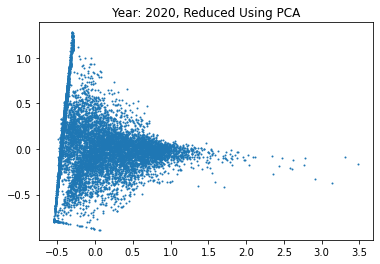

In [4]:
# Reduce dimensionality (using PCA)
pca = PCA(n_components=2)
commentors_pca = pca.fit_transform(commentors_rescaled)

# Visualize 2-dimensional data
plt.scatter(commentors_pca[:, 0], commentors_pca[:, 1], s=1)
plt.title('Year: 2020, Reduced Using PCA')
plt.show()

[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 11074 samples in 0.000s...
[t-SNE] Computed neighbors for 11074 samples in 75.513s...
[t-SNE] Computed conditional probabilities for sample 1000 / 11074
[t-SNE] Computed conditional probabilities for sample 2000 / 11074
[t-SNE] Computed conditional probabilities for sample 3000 / 11074
[t-SNE] Computed conditional probabilities for sample 4000 / 11074
[t-SNE] Computed conditional probabilities for sample 5000 / 11074
[t-SNE] Computed conditional probabilities for sample 6000 / 11074
[t-SNE] Computed conditional probabilities for sample 7000 / 11074
[t-SNE] Computed conditional probabilities for sample 8000 / 11074
[t-SNE] Computed conditional probabilities for sample 9000 / 11074
[t-SNE] Computed conditional probabilities for sample 10000 / 11074
[t-SNE] Computed conditional probabilities for sample 11000 / 11074
[t-SNE] Computed conditional probabilities for sample 11074 / 11074
[t-SNE] Mean sigma: 0.083427
[t-SNE] KL divergen

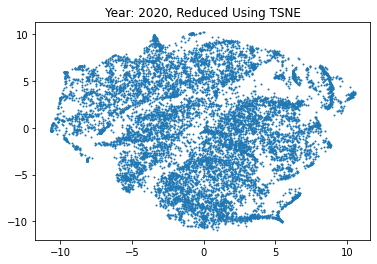

In [5]:
# Reduce dimensionality (using TSNE)
tsne = TSNE(n_components=2, verbose=1, perplexity=40, n_iter=300, random_state=42)
tsne_results = tsne.fit_transform(commentors_rescaled)

# Visualize 2-dimensional data
plt.scatter(tsne_results[:, 0], tsne_results[:, 1], s=1)
plt.title('Year: 2020, Reduced Using TSNE')
plt.show()

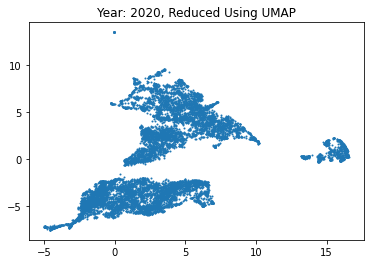

In [6]:
# Reduce dimensionality (using UMAP)
reducer = umap.UMAP(n_components=2, random_state=42)
embedding = reducer.fit_transform(commentors_rescaled)

# Visualize 2-dimensional data
plt.scatter(embedding[:, 0], embedding[:, 1], s=1)
plt.title('Year: 2020, Reduced Using UMAP')
plt.show()

### Cluster

In [8]:
# Check scikit-learn version
import sklearn
sklearn.__version__

'0.24.1'

In [20]:
# Affinity propagation clustering
from sklearn.cluster import AffinityPropagation
X = np.array([[1, 2], [1, 4], [1, 0],
              [4, 2], [4, 4], [4, 0]])

clustering = AffinityPropagation(max_iter=200, random_state=42).fit(X)
print(clustering.labels_)
print(clustering.predict([[0, 0], [4, 4]]))
print(clustering.cluster_centers_)


[0 0 0 1 1 1]
[0 1]
[[1 2]
 [4 2]]


In [26]:
clustering = AffinityPropagation(max_iter=10, random_state=42).fit(embedding)

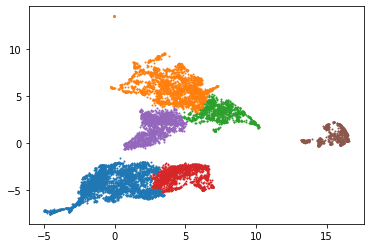

In [40]:
from sklearn.cluster import Birch
from matplotlib import pyplot

model = Birch(threshold=0.01, n_clusters=6)
model.fit(embedding)
yhat = model.predict(embedding)
clusters = np.unique(yhat)
clusters
for cluster in clusters:
    row_ix = np.where(yhat == cluster)
    pyplot.scatter(embedding[row_ix, 0], embedding[row_ix, 1], s=1)
pyplot.show()

[-1  0  1  2  3  4  5  6  7  8  9]


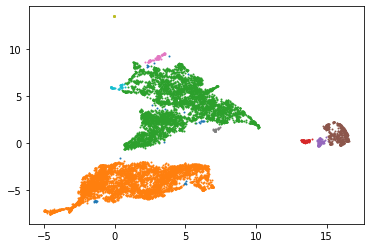

In [79]:
from sklearn.cluster import DBSCAN
model = DBSCAN(eps=0.28, min_samples=10, n_jobs=-1)
yhat = model.fit_predict(embedding)
clusters = np.unique(yhat)
print(clusters)

for cluster in clusters:
    row_ix = np.where(yhat == cluster)
    pyplot.scatter(embedding[row_ix, 0], embedding[row_ix, 1], s=1)
pyplot.show()

[0 1 2 3 4 5]


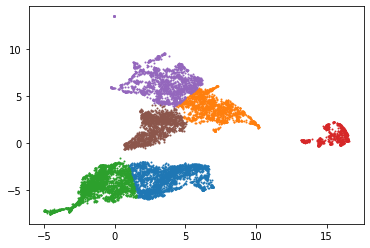

In [52]:
from sklearn.cluster import KMeans
model = KMeans(n_clusters=6)
model.fit(embedding)
yhat = model.predict(embedding)
clusters = np.unique(yhat)
print(clusters)

for cluster in clusters:
    row_ix = np.where(yhat == cluster)
    pyplot.scatter(embedding[row_ix, 0], embedding[row_ix, 1], s=1)
pyplot.show()

[0 1 2 3]


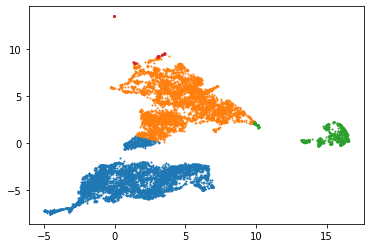

In [53]:
from sklearn.cluster import MeanShift
model = MeanShift()
yhat = model.fit_predict(embedding)
clusters = np.unique(yhat)
print(clusters)

for cluster in clusters:
    row_ix = np.where(yhat == cluster)
    pyplot.scatter(embedding[row_ix, 0], embedding[row_ix, 1], s=1)
pyplot.show()

[-1  0  1  2]


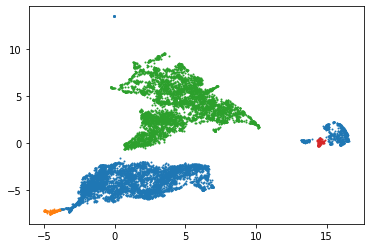

In [56]:
from sklearn.cluster import OPTICS
model = OPTICS(eps=0.8, min_samples=100)
yhat = model.fit_predict(embedding)
clusters = np.unique(yhat)
print(clusters)

for cluster in clusters:
    row_ix = np.where(yhat == cluster)
    pyplot.scatter(embedding[row_ix, 0], embedding[row_ix, 1], s=1)
pyplot.show()

In [59]:
from sklearn.cluster import SpectralClustering
model = SpectralClustering(n_clusters=2, random_state=42, n_init=1)
yhat = model.fit_predict(embedding)
clusters = np.unique(yhat)
print(clusters)

for cluster in clusters:
    row_ix = np.where(yhat == cluster)
    pyplot.scatter(embedding[row_ix, 0], embedding[row_ix, 1], s=1)
pyplot.show()

KeyboardInterrupt: 

[0 1 2 3 4 5 6 7]


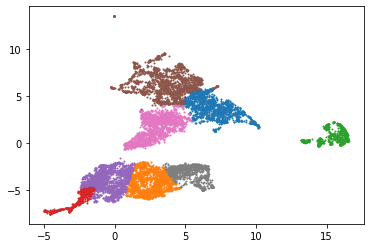

In [67]:
from sklearn.mixture import GaussianMixture
model = GaussianMixture(n_components=8, random_state=42)
model.fit(embedding)
yhat = model.predict(embedding)
clusters = np.unique(yhat)
print(clusters)

for cluster in clusters:
    row_ix = np.where(yhat == cluster)
    pyplot.scatter(embedding[row_ix, 0], embedding[row_ix, 1], s=1)
pyplot.show()

### OBE: Iterate through the years a find optimal number of clusters + visualization

comment_features_2008.csv [0.41905519 0.12678593]
2 clusters results in sil score of 0.610219134656607
3 clusters results in sil score of 0.5532547445299478
4 clusters results in sil score of 0.5201263317306722
5 clusters results in sil score of 0.4688508012090544
6 clusters results in sil score of 0.46665271276388975
7 clusters results in sil score of 0.45888844455917743
8 clusters results in sil score of 0.41660667325759604
9 clusters results in sil score of 0.4219035279317407


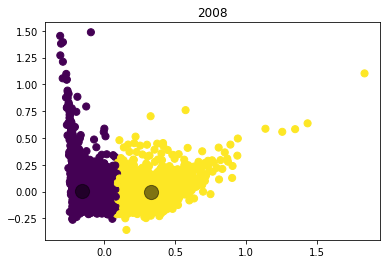

--------------------------------------------------
comment_features_2009.csv [0.31189371 0.23729745]
2 clusters results in sil score of 0.663166760790721
3 clusters results in sil score of 0.690747706181107
4 clusters results in sil score of 0.6758378832737192
5 clusters results in sil score of 0.6629403447646647
6 clusters results in sil score of 0.6547145809676618
7 clusters results in sil score of 0.6259157885320475
8 clusters results in sil score of 0.588526069389245
9 clusters results in sil score of 0.6231829579429712


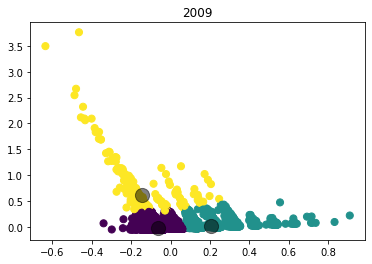

--------------------------------------------------
comment_features_2010.csv [0.28888989 0.14474989]
2 clusters results in sil score of 0.7191425187334627
3 clusters results in sil score of 0.5012619622353625
4 clusters results in sil score of 0.5111349801662441
5 clusters results in sil score of 0.4287856104405802
6 clusters results in sil score of 0.42823821109994537
7 clusters results in sil score of 0.4120527213082494
8 clusters results in sil score of 0.4094482426089384
9 clusters results in sil score of 0.3970473148348937


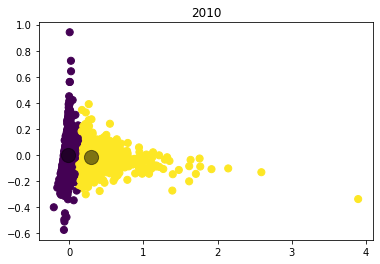

--------------------------------------------------
comment_features_2011.csv [0.25801382 0.24142601]
2 clusters results in sil score of 0.4770410166691435
3 clusters results in sil score of 0.48733534290318203
4 clusters results in sil score of 0.4308471528674625
5 clusters results in sil score of 0.439905495361702
6 clusters results in sil score of 0.3959892846206246
7 clusters results in sil score of 0.4068600839029219
8 clusters results in sil score of 0.42099283886847105
9 clusters results in sil score of 0.40056817984108195


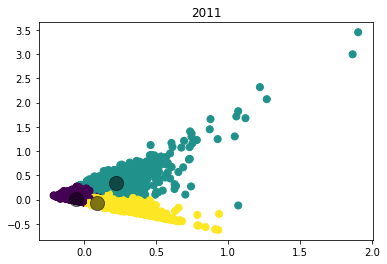

--------------------------------------------------
comment_features_2012.csv [0.29802605 0.255826  ]
2 clusters results in sil score of 0.7839044672476592
3 clusters results in sil score of 0.4780683265461411
4 clusters results in sil score of 0.4958743349228139
5 clusters results in sil score of 0.44267391160536584
6 clusters results in sil score of 0.4516412775738795
7 clusters results in sil score of 0.413975356081633
8 clusters results in sil score of 0.42241710031958507
9 clusters results in sil score of 0.4002797442226851


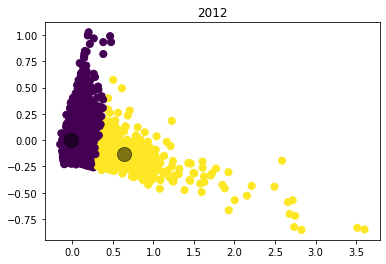

--------------------------------------------------
comment_features_2013.csv [0.33704309 0.14585959]
2 clusters results in sil score of 0.8722692171929619
3 clusters results in sil score of 0.4276839681490263
4 clusters results in sil score of 0.4724831839872942
5 clusters results in sil score of 0.4936020937268035
6 clusters results in sil score of 0.43891086203218654
7 clusters results in sil score of 0.4499458371985269
8 clusters results in sil score of 0.420599974525728
9 clusters results in sil score of 0.4238018452701653


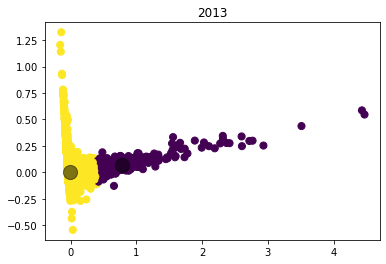

--------------------------------------------------
comment_features_2014.csv [0.35007066 0.14331192]
2 clusters results in sil score of 0.7917352869784917
3 clusters results in sil score of 0.467506762856978
4 clusters results in sil score of 0.5075669479882247
5 clusters results in sil score of 0.5039135085423561
6 clusters results in sil score of 0.48590468331543496
7 clusters results in sil score of 0.49062938643163295
8 clusters results in sil score of 0.49005996745740416
9 clusters results in sil score of 0.45060278737630777


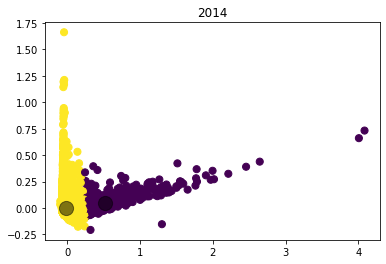

--------------------------------------------------
comment_features_2015.csv [0.50861003 0.09666123]
2 clusters results in sil score of 0.8896265563673157
3 clusters results in sil score of 0.6312667060541156
4 clusters results in sil score of 0.6535731948815746
5 clusters results in sil score of 0.6678304141572824
6 clusters results in sil score of 0.6683642261972226
7 clusters results in sil score of 0.6505616685148831
8 clusters results in sil score of 0.5949722090177701
9 clusters results in sil score of 0.5958646601158039


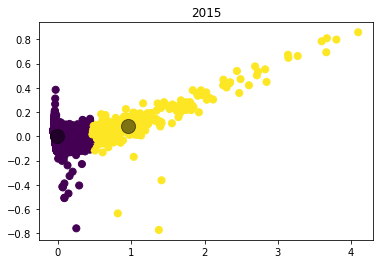

--------------------------------------------------
comment_features_2016.csv [0.39460374 0.18724834]
2 clusters results in sil score of 0.6775602388317586
3 clusters results in sil score of 0.7038366118519678
4 clusters results in sil score of 0.7123524912014463
5 clusters results in sil score of 0.6313543741134373
6 clusters results in sil score of 0.6417414997495883
7 clusters results in sil score of 0.6415323204504382
8 clusters results in sil score of 0.6072881774868958
9 clusters results in sil score of 0.6095982871016882


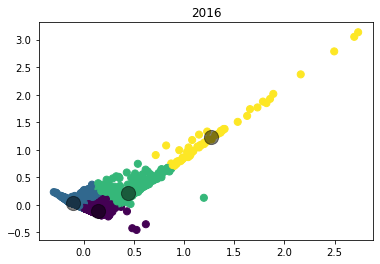

--------------------------------------------------
comment_features_2017.csv [0.38145925 0.16296644]
2 clusters results in sil score of 0.6761914340935826
3 clusters results in sil score of 0.7026091650390713
4 clusters results in sil score of 0.7094869374443321
5 clusters results in sil score of 0.6438265610366114
6 clusters results in sil score of 0.6455052955382478
7 clusters results in sil score of 0.6020182978541951
8 clusters results in sil score of 0.6020756255844117
9 clusters results in sil score of 0.6111352175087722


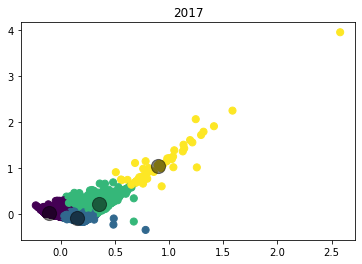

--------------------------------------------------
comment_features_2018.csv [0.36832888 0.17641039]
2 clusters results in sil score of 0.6540506032043757
3 clusters results in sil score of 0.6734598576112755
4 clusters results in sil score of 0.6806549086870658
5 clusters results in sil score of 0.5928808537856588
6 clusters results in sil score of 0.5984626066272015
7 clusters results in sil score of 0.5990821435156173
8 clusters results in sil score of 0.5347476915843388
9 clusters results in sil score of 0.5380715947467715


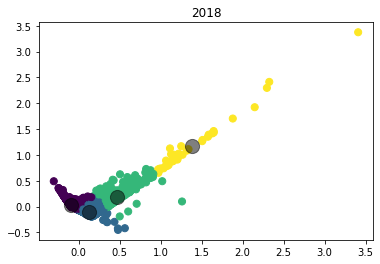

--------------------------------------------------
comment_features_2019.csv [0.51664018 0.13282181]
2 clusters results in sil score of 0.7045579271437298
3 clusters results in sil score of 0.7157470614648195
4 clusters results in sil score of 0.6258117318724263
5 clusters results in sil score of 0.6345097574355542
6 clusters results in sil score of 0.5805607968938974
7 clusters results in sil score of 0.5872537189838801
8 clusters results in sil score of 0.5638369231514959
9 clusters results in sil score of 0.5503567394192186


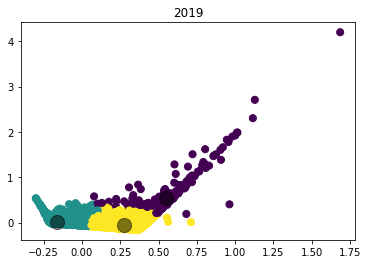

--------------------------------------------------
comment_features_2020.csv [0.64426299 0.12118009]
2 clusters results in sil score of 0.7401996972022759
3 clusters results in sil score of 0.7486863346522546
4 clusters results in sil score of 0.706994048210208
5 clusters results in sil score of 0.7123607949869809
6 clusters results in sil score of 0.6600547213398249
7 clusters results in sil score of 0.6630446704868553
8 clusters results in sil score of 0.6335280681731142
9 clusters results in sil score of 0.6254059539269144


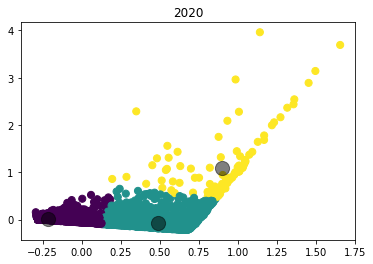

--------------------------------------------------


In [41]:
commentor_years = os.listdir('../data/cleaned/yearly_comment_features/')
commentor_years

for year in commentor_years:
    commentors = pd.read_csv(f'../data/cleaned/yearly_comment_features/{year}', index_col=0, header=0)
    shape_before = commentors.shape
    
    # Drop non-feature columns
    to_drop = ['commentor.1', 'min', 'max', 'username']
    commentors.drop(to_drop, axis=1, inplace=True)
#     print(shape_before, commentors.shape)

    # Replace NaNs
    commentors.fillna(0, inplace=True)
    
    # Scale to the range: 0 to 1
    scaler = MinMaxScaler(feature_range=[0, 1])
    commentors_rescaled = scaler.fit_transform(commentors)

    # Reduce dimensionality to 2
    pca = PCA(n_components=2)
    commentors_pca = pca.fit(commentors_rescaled)
    print(year, pca.explained_variance_ratio_)
    
    # K-means
    np.random.seed(42)
    commentors_pca = pca.fit_transform(commentors_rescaled)
    best = 0
    highest_sil = 0
    for i in range(2,10):
        cluster = KMeans(n_clusters=i, random_state=42)
        cluster_labels = cluster.fit_predict(commentors_pca)
        silhouettee_avg = silhouette_score(commentors_pca, cluster_labels, random_state=42)
        if silhouettee_avg > highest_sil:
            highest_sil = silhouettee_avg
            best = i
        print(f'{i} clusters results in sil score of {silhouettee_avg}')
        
    # Visualize clusters w/ centers
    cluster = KMeans(n_clusters=best, random_state=42)
    y_kmeans = cluster.fit_predict(commentors_pca)
    plt.scatter(commentors_pca[:, 0], commentors_pca[:, 1], c=y_kmeans, s=50, cmap='viridis')
    centers = cluster.cluster_centers_
    plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5)
    plt.title(year[-8:-4])
    plt.show()
    
    print('-' * 50)